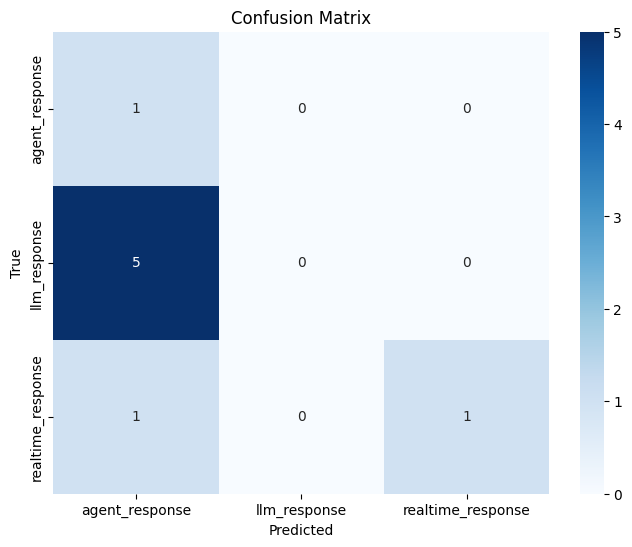

Accuracy: 0.25
Classification Report:
                    precision    recall  f1-score   support

   agent_response       0.14      1.00      0.25         1
     llm_response       0.00      0.00      0.00         5
realtime_response       1.00      0.50      0.67         2

         accuracy                           0.25         8
        macro avg       0.38      0.50      0.31         8
     weighted avg       0.27      0.25      0.20         8

Sentence: 'what is the name of the god in garura pauran' => Predicted Label: agent_response


/Users/prabirkalwani/Data/Programming/Personal_Git_Repos/Apollo-Voice-Assistant/server/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/prabirkalwani/Data/Programming/Personal_Git_Repos/Apollo-Voice-Assistant/server/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/prabirkalwani/Data/Programming/Personal_Git_Repos/Apollo-Voice-Assistant/server/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is il

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



sentences = [
    "What is the capital of Australia?",
    "Tell me a joke about a dog.",
    "Set an alarm for 7:00 AM tomorrow.",
    "What's the meaning of life?",
    "Translate 'Hello world' into Spanish.",
    "Write a short poem about the ocean.",
    "What's the weather forecast for tomorrow?",
    "Book a flight to Los Angeles.",
    "What are the main causes of climate change?",
    "Play some relaxing music.",
    "How many planets are in our solar system?",
    "Compose a haiku about springtime.",
    "Remind me to call my mom at 6 PM.",
    "What is the Pythagorean theorem?",
    "Tell me a fun fact about elephants.",
    "What's the latest news on the COVID-19 pandemic?",
    "Write a short story about a time traveler.",
    "What are the symptoms of the flu?",
    "Set a timer for 10 minutes.",
    "Explain the concept of gravity.",
    "What are the benefits of exercise?",
    "Write a limerick about a cat.",
    "What's the population of Tokyo?",
    "Book a table for two at a nice restaurant.",
    "Summarize the plot of the movie 'Inception'.",
    "What are the different types of clouds?",
    "Play a game of trivia.",
    "What is the chemical formula for water?",
    "Translate 'Thank you' into French.",
    "Write a song about love.",
    "What are the main principles of Buddhism?",
    "Remind me to buy groceries tomorrow.",
    "What is the history of the Olympic Games?",
    "Write a short essay about the importance of education.",
    "What are the different types of renewable energy?",
    "Play some upbeat music for working out.",
    "What is the meaning of the word 'serendipity'?",
    "Book a hotel room in Paris.",
]

labels = [
    "llm_response" if i % 3 == 0 else "realtime_response" if i % 3 == 1 else "agent_response"
    for i in range(len(sentences))  # Use len(questions) to match the number of questions
]


# Vectorize the sentences
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluation - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Test with your own input
custom_sentences = ["what is the name of the god in garura pauran"]

# Vectorize the custom sentences
custom_X = vectorizer.transform(custom_sentences)

# Predict the labels for custom inputs
custom_predictions = svm_classifier.predict(custom_X)

# Display predictions
for sentence, prediction in zip(custom_sentences, custom_predictions):
    print(f"Sentence: '{sentence}' => Predicted Label: {prediction}")